<a href="https://colab.research.google.com/github/geetaakshata/Cousera_capstone/blob/main/Predicting_Traffic_Accident_Severity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project - Predicting Traffic Accident Severity
## Applied DSc Capstone by IBM/Coursera

#Table of Contants

1. Introduction
2. Data
3. Data Cleaning
4. Exploratory Data Analysis
5. Data Preparation
6. Model Development
7. Results

#### 1. Introduction/Business Problem 

Road traffic injuries are currently estimated to be the eighth leading cause of death across all age groups globally, and are predicted to become the seventh leading cause of death by 2030.

Analysing a significant range of factors, including weather conditions, special events, roadworks, traffic jams among others, an accurate prediction of the severity of the accidents can be performed.

These insights, could allow law enforcement bodies to allocate their resources more effectively in advance of potential accidents, preventing when and where a severe accidents can occur as well as saving both, time and money. In addition, this knowledge of a severe accident situation can be warned to drivers so that they would drive more carefully or even change their route if it is possible or to hospital which could have set everything ready for a severe intervention in advance.

Governments should be highly interested in accurate predictions of the severity of an accident, in order to reduce the time of arrival and thus save a significant amount of people each year. Others interested could be private companies investing in technologies aiming to improve road safeness.

#### 2. Data

The original data for this project comes from the following Kaggle data set. 
The features of the dataset resulting are the following:

In the characteristics dataset, the features are : "lighting", "localisation"(agg), "type of intersection", "atmospheric conditions", "type of collisions", "department", "adress", "time" and the coordinates. Added two new features from this original dataset: "date" and "weekend" indicating if the accident occurred during the weekend or not.

In the places dataset,  keep only the features: "road categorie", "traffic regime", "number of traffic lanes", "road profile", "road shape", "surface condition", "situation", "school nearby" and "infrastructure".

From the users dataset, I have created the following features:

* num_us: total number of users involved in the accident.
* ped: Wether there are pedestrians involved or not.
* critic_age: If there is any user in between 17 and 31 y.o.
* sev : maximum gravity suffered by any user involved in the accident:
 * 0 = Unscathered or Light injury
 * 1 = Hospitalized wonded or Death

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

### Importing Data

In [4]:
df_char = pd.read_csv('/caracteristics.csv', encoding='latin-1', low_memory=False)
df_pl = pd.read_csv('/places.csv')
df_users = pd.read_csv(r'/users.csv')
df_veh = pd.read_csv(r'/vehicles.csv')
df_holi = pd.read_csv('/holidays.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## caracteristics and places

In [5]:
df_char.head()

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep
0,201600000001,16,2,1,1445,1,2,1,8.0,3.0,5.0,"46, rue Sonneville",M,0.0,0,590
1,201600000002,16,3,16,1800,1,2,6,1.0,6.0,5.0,1a rue du cimetière,M,0.0,0,590
2,201600000003,16,7,13,1900,1,1,1,1.0,6.0,11.0,NaN,M,0.0,0,590
3,201600000004,16,8,15,1930,2,2,1,7.0,3.0,477.0,52 rue victor hugo,M,0.0,0,590
4,201600000005,16,12,23,1100,1,2,3,1.0,3.0,11.0,rue Joliot curie,M,0.0,0,590


In [6]:
# dropping unrelevant columns.
df_char.drop(['adr','com', 'gps'], axis=1, inplace=True)
df_pl.drop(['v1', 'v2', 'pr', 'pr1', 'lartpc', 'larrout'], axis=1,  inplace=True)
df_veh.drop(['senc', 'occutc', 'obs', 'obsm', 'choc', 'manv', 'num_veh'], axis=1, inplace=True)
print(df_char.shape, df_pl.shape, df_veh.shape, df_users.shape)
df_pl

(839985, 13) (839985, 12) (1433389, 2) (1876005, 12)


,Num_Acc,catr,voie,circ,nbv,vosp,prof,plan,surf,infra,situ,env1
0,201600000001,3.0,39,2.0,0.0,0.0,1.0,3.0,1.0,0.0,1.0,0.0
1,201600000002,3.0,39,1.0,0.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0
2,201600000003,3.0,1,2.0,2.0,0.0,1.0,3.0,2.0,0.0,3.0,99.0
3,201600000004,4.0,0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,99.0
4,201600000005,4.0,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
839980,200500087950,4.0,0,2.0,3.0,0.0,1.0,1.0,1.0,0.0,1.0,3.0
839981,200500087951,4.0,0,2.0,2.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0
839982,200500087952,4.0,0,1.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,3.0
839983,200500087953,4.0,0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0


In [7]:
df_char.columns = ['ID', 'year', 'month', 'day', 'time', 'lum', 'agg', 'int', 'atm', 'col', 'lat', 'long', 'dep']
df_pl.columns = ['ID','road_cat', 'road_num', 'traf_reg', 'num_lanes', 'res_lane', 'long_prof', 'shape', 'surf', 'infra', 'situation', 'school']
df = df_char.merge(df_pl, how='inner',on='ID')
df.head(5)

,ID,year,month,day,time,lum,agg,int,atm,col,lat,long,dep,road_cat,road_num,traf_reg,num_lanes,res_lane,long_prof,shape,surf,infra,situation,school
0,201600000001,16,2,1,1445,1,2,1,8.0,3.0,0.0,0,590,3.0,39,2.0,0.0,0.0,1.0,3.0,1.0,0.0,1.0,0.0
1,201600000002,16,3,16,1800,1,2,6,1.0,6.0,0.0,0,590,3.0,39,1.0,0.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0
2,201600000003,16,7,13,1900,1,1,1,1.0,6.0,0.0,0,590,3.0,1,2.0,2.0,0.0,1.0,3.0,2.0,0.0,3.0,99.0
3,201600000004,16,8,15,1930,2,2,1,7.0,3.0,0.0,0,590,4.0,0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,99.0
4,201600000005,16,12,23,1100,1,2,3,1.0,3.0,0.0,0,590,4.0,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,3.0


## vehicles

In [8]:
df_veh.columns

Index(['Num_Acc', 'catv'], dtype='object')

In [9]:
df_veh.head(10)

,Num_Acc,catv
0,201600000001,7
1,201600000001,2
2,201600000002,7
3,201600000003,7
4,201600000004,32
5,201600000004,7
6,201600000005,30
7,201600000005,7
8,201600000006,7
9,201600000007,30


In [10]:
categories = df_veh['catv'].value_counts()
categories.sort_index()

1      58128
2      79884
3       5008
4       7463
5      21816
6         39
7     890217
8        120
9        300
10     70205
11        17
12        79
13      5295
14     15392
15     11782
16       657
17     11501
18      2075
19       183
20      1383
21      2762
30     59918
31     28038
32     29596
33     97185
34     13436
35       367
36      1624
37      9071
38      2524
39       328
40      1555
99      5441
Name: catv, dtype: int64

Values in the category of vehicle feature do no match with the description of this feature. There are more than 33 different classifications are found in the vehicles data set. Thus, I won't use this data due to lack of information on its meaning.

### users

In [11]:
df_users.head(5)

,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh
0,201600000001,1.0,1,1,2,0.0,11.0,0.0,0.0,0.0,1983.0,B02
1,201600000001,1.0,1,3,1,9.0,21.0,0.0,0.0,0.0,2001.0,A01
2,201600000002,1.0,1,3,1,5.0,11.0,0.0,0.0,0.0,1960.0,A01
3,201600000002,2.0,2,3,1,0.0,11.0,0.0,0.0,0.0,2000.0,A01
4,201600000002,3.0,2,3,2,0.0,11.0,0.0,0.0,0.0,1962.0,A01


In [12]:
df_users.drop(['place', 'sexe', 'trajet', 'locp', 'actp', 'etatp', 'num_veh'], axis=1, inplace=True)
df_users.columns = ['ID', 'catu', 'grav', 'secu', 'year_birth']
df_users.sort_values(by='ID').head(10)

,ID,catu,grav,secu,year_birth
1678507,200500000001,1,4,11.0,1976.0
1678512,200500000001,2,1,11.0,1991.0
1678511,200500000001,2,1,11.0,1998.0
1678508,200500000001,1,3,11.0,1968.0
1678509,200500000001,2,1,11.0,1964.0
1678510,200500000001,2,1,31.0,2004.0
1678514,200500000002,1,3,21.0,1979.0
1678513,200500000002,1,1,11.0,1955.0
1678516,200500000003,1,3,21.0,1956.0
1678515,200500000003,1,1,21.0,1983.0


In [13]:
#number of users

num_users = df_users.ID.value_counts().sort_index(ascending=True)
num_users

200500000001    6
200500000002    2
200500000003    2
200500000004    4
200500000005    2
               ..
201600059428    2
201600059429    1
201600059430    2
201600059431    2
201600059432    3
Name: ID, Length: 839985, dtype: int64

In [14]:
#pedestrians

df_users['ped'] = df_users['catu'].apply(lambda x: 1 if x==3 else 0)
df_users.head(5)

,ID,catu,grav,secu,year_birth,ped
0,201600000001,1,1,11.0,1983.0,0
1,201600000001,1,3,21.0,2001.0,0
2,201600000002,1,3,11.0,1960.0,0
3,201600000002,2,3,11.0,2000.0,0
4,201600000002,2,3,11.0,1962.0,0


In [15]:
df_users2 = df_users.groupby('ID').sum()
ped = df_users2.ped
print('Accidents in which pedestrians have been involved:')
df_users2.ped.value_counts()

Accidents in which pedestrians have been involved:


0     693464
1     139020
2       6415
3        773
4        214
5         55
6         19
7         13
10         4
9          3
8          2
25         1
21         1
15         1
Name: ped, dtype: int64

In [16]:
# crical age

acc_year = df_users.ID.astype(str).str[:4] # year of the accident
age = acc_year.astype(int) - df_users['year_birth'] # age of the user
df_users['age']= age
df_users

,ID,catu,grav,secu,year_birth,ped,age
0,201600000001,1,1,11.0,1983.0,0,33.0
1,201600000001,1,3,21.0,2001.0,0,15.0
2,201600000002,1,3,11.0,1960.0,0,56.0
3,201600000002,2,3,11.0,2000.0,0,16.0
4,201600000002,2,3,11.0,1962.0,0,54.0
...,...,...,...,...,...,...,...
1876000,200500087953,1,1,13.0,1972.0,0,33.0
1876001,200500087953,1,1,13.0,1965.0,0,40.0
1876002,200500087953,1,4,23.0,1990.0,0,15.0
1876003,200500087954,1,4,13.0,1951.0,0,54.0


In [17]:
df2 = df_users[df_users['grav']==2]
deaths = df2['age'].value_counts()
deaths.sort_values(ascending=False)

total, suma, i = deaths.values.sum(), 0, 0

for num in deaths.values:
    suma += num
    per = (suma/total)*100
    if per<=50:
        i += 1
        percentage = per
print('A % 2.2f percent of a total of %4i deaths is found on the %2i first ages, being the deaths array sorted by number of deaths.' %(percentage,total,i))

A  49.96 percent of a total of 50487 deaths is found on the 25 first ages, being the deaths array sorted by number of deaths.


In [18]:
topdeaths = deaths.head(15)
print('Half of the deaths in a car accident are aged between % 2d and % 2.0i y.o.'
      % (topdeaths.index.min(), topdeaths.index.max()))
topdeaths

Half of the deaths in a car accident are aged between  17 and  31 y.o.


20.0    1630
21.0    1600
22.0    1582
19.0    1529
23.0    1401
24.0    1401
25.0    1289
18.0    1219
26.0    1177
27.0    1006
28.0     923
29.0     918
31.0     822
17.0     811
30.0     801
Name: age, dtype: int64

Text(0.5, 1.0, 'Total number of deahts by age from 2005 to 2016')

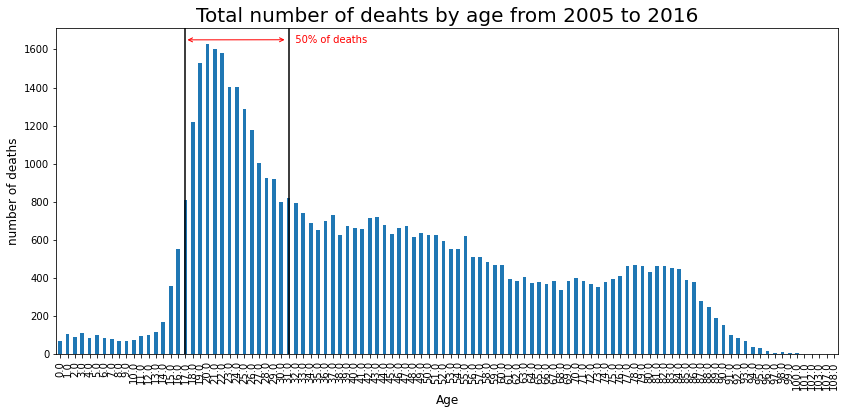

In [19]:

pd.DataFrame(deaths)
dplot=deaths.sort_index()
dplot.plot.bar(figsize=(14,6))

plt.annotate('  50% of deaths',
             color='r',
            xy=(17,1650),
            xytext=(31,1635),
            arrowprops=dict(arrowstyle='<->', color='r')
            )

plt.axvline(x=17, color='black', linestyle='-')
plt.axvline(x=31, color='black', linestyle='-')

plt.xlabel('Age', size=12)
plt.ylabel('number of deaths', size=12)
plt.title('Total number of deahts by age from 2005 to 2016', size=20)

People older than 84 are more likely to die with at least 1 out of 10 of the times, rising to beyond 35% in some cases.


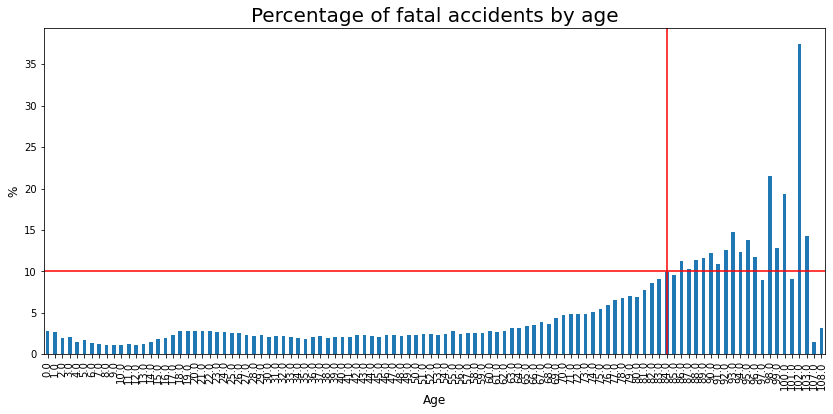

In [20]:
#deadth age
death = df2['age'].value_counts().sort_index()
total = df_users['age'].value_counts().sort_index()
death_prop = (deaths/total)*100
d = death_prop.dropna()
minimum = d[d>9.9].index.min()
d.plot.bar(figsize=(14,6))
# plt.xticks(range(108)[0::2])
plt.title('Percentage of fatal accidents by age', size=20)
plt.xlabel('Age', size=12)
plt.ylabel('%', size=12)
plt.axhline(y=10, color='r')
plt.axvline(x=84, color='r')
print('People older than {0:2} are more likely to die\
 with at least 1 out of 10 of the times, rising to beyond 35% in some cases.'.format(int(minimum)))

In [21]:
df_users['crit_age'] = df_users['age'].apply(lambda x: 1 if 17<=x<=31 else 0)
df_users['dead_age'] = df_users['age'].apply(lambda x: 1 if x>84 else 0)

df_users.head(5)

,ID,catu,grav,secu,year_birth,ped,age,crit_age,dead_age
0,201600000001,1,1,11.0,1983.0,0,33.0,0,0
1,201600000001,1,3,21.0,2001.0,0,15.0,0,0
2,201600000002,1,3,11.0,1960.0,0,56.0,0,0
3,201600000002,2,3,11.0,2000.0,0,16.0,0,0
4,201600000002,2,3,11.0,1962.0,0,54.0,0,0


In [22]:
df2 = df_users.groupby('ID').sum().sort_index(ascending=True)
df2['crit_age1'] = df2['crit_age'].apply(lambda x: 1 if x>0 else 0)
df2['dead_age1'] = df2['dead_age'].apply(lambda x: 1 if x>0 else 0)
df2['ped1'] = df2['ped'].apply(lambda x: 1 if x>0 else 0)
df2['num_us'] = num_users
df2

,catu,grav,secu,year_birth,ped,age,crit_age,dead_age,crit_age1,dead_age1,ped1,num_us
ID,,,,,,,,,,,,
200500000001,10,11,86.0,11901.0,0,129.0,1,0,1,0,0,6
200500000002,2,4,32.0,3934.0,0,76.0,1,0,1,0,0,2
200500000003,2,4,42.0,3939.0,0,71.0,1,0,1,0,0,2
200500000004,5,14,44.0,7779.0,0,241.0,0,1,0,1,0,4
200500000005,3,7,22.0,3939.0,0,71.0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
201600059428,4,5,21.0,3994.0,1,38.0,1,0,1,0,1,2
201600059429,1,4,21.0,1984.0,0,32.0,0,0,0,0,0,1
201600059430,2,5,32.0,3972.0,0,60.0,1,0,1,0,0,2


Last feature is the severity from the gravity feature of the users dataset. Currently it consists of 4 labels:

* Unscathed
* Dead
* Hospitalized Wonded
* Light Injury

In [23]:
def change_grav(x):
    if x==1 or x==4:
        return 0
    else:
        return 1
df3 = df_users[['ID', 'grav']].copy()
df3['grav'] = df_users['grav'].apply(change_grav)
df3.sort_values(by='ID')

,ID,grav
1678507,200500000001,0
1678512,200500000001,0
1678511,200500000001,0
1678508,200500000001,1
1678509,200500000001,0
...,...,...
133417,201600059431,0
133418,201600059431,0
133421,201600059432,0
133420,201600059432,0


In [24]:
severity = df3[['grav', 'ID']].groupby('ID').max().sort_index(ascending=True)
severity

,grav
ID,
200500000001,1
200500000002,1
200500000003,1
200500000004,1
200500000005,1
...,...
201600059428,0
201600059429,0
201600059430,0


In [25]:
df2['sev'] = severity
df2.reset_index(inplace=True)
df2

,ID,catu,grav,secu,year_birth,ped,age,crit_age,dead_age,crit_age1,dead_age1,ped1,num_us,sev
0,200500000001,10,11,86.0,11901.0,0,129.0,1,0,1,0,0,6,1
1,200500000002,2,4,32.0,3934.0,0,76.0,1,0,1,0,0,2,1
2,200500000003,2,4,42.0,3939.0,0,71.0,1,0,1,0,0,2,1
3,200500000004,5,14,44.0,7779.0,0,241.0,0,1,0,1,0,4,1
4,200500000005,3,7,22.0,3939.0,0,71.0,0,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839980,201600059428,4,5,21.0,3994.0,1,38.0,1,0,1,0,1,2,0
839981,201600059429,1,4,21.0,1984.0,0,32.0,0,0,0,0,0,1,0
839982,201600059430,2,5,32.0,3972.0,0,60.0,1,0,1,0,0,2,0
839983,201600059431,2,8,42.0,3984.0,0,48.0,2,0,1,0,0,2,0


In [26]:
df = df.merge(df2[['ID','crit_age1', 'ped1','dead_age1', 'num_us', 'sev']], on='ID', how='left')
df

,ID,year,month,day,time,lum,agg,int,atm,col,lat,long,dep,road_cat,road_num,traf_reg,num_lanes,res_lane,long_prof,shape,surf,infra,situation,school,crit_age1,ped1,dead_age1,num_us,sev
0,201600000001,16,2,1,1445,1,2,1,8.0,3.0,0.0,0,590,3.0,39,2.0,0.0,0.0,1.0,3.0,1.0,0.0,1.0,0.0,0,0,0,2,1
1,201600000002,16,3,16,1800,1,2,6,1.0,6.0,0.0,0,590,3.0,39,1.0,0.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0,0,0,0,3,1
2,201600000003,16,7,13,1900,1,1,1,1.0,6.0,0.0,0,590,3.0,1,2.0,2.0,0.0,1.0,3.0,2.0,0.0,3.0,99.0,1,1,0,2,1
3,201600000004,16,8,15,1930,2,2,1,7.0,3.0,0.0,0,590,4.0,0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,99.0,1,0,0,3,1
4,201600000005,16,12,23,1100,1,2,3,1.0,3.0,0.0,0,590,4.0,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,3.0,0,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839980,200500087950,5,12,21,2035,5,2,2,1.0,3.0,NaN,NaN,974,4.0,0,2.0,3.0,0.0,1.0,1.0,1.0,0.0,1.0,3.0,1,0,0,2,0
839981,200500087951,5,12,23,1010,1,2,1,1.0,3.0,NaN,NaN,974,4.0,0,2.0,2.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0,0,0,0,3,0
839982,200500087952,5,12,26,1715,1,2,2,1.0,3.0,NaN,NaN,974,4.0,0,1.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,3.0,1,0,0,3,0
839983,200500087953,5,12,27,1500,1,2,3,2.0,5.0,NaN,NaN,974,4.0,0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0,0,0,3,0


## Date and time

In [27]:
from datetime import datetime 

dt = df[['ID','year', 'month', 'day', 'time' ]]
#weekday
date = (dt.year+2000)*10000+dt.month*100+dt.day
dt['date'] = pd.to_datetime(date, format='%Y%m%d')
dt['weekday'] = dt['date'].dt.weekday #weekday functin from datetime gives a number to each day of the week from 0 to 6.

#weekend
dt['weekend'] = dt['weekday'].apply(lambda x: 1 if x>4 else 0)

#night
# dt['night'] = dt['hhmm'].apply(lambda x: 1 if 700>x or x>2100 else 0) 

#holiday
dt.loc[dt.date.isin(df_holi.ds) , 'holiday'] = 1
dt.holiday.fillna(0, inplace=True)
dt.head(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

,ID,year,month,day,time,date,weekday,weekend,holiday
0,201600000001,16,2,1,1445,2016-02-01,0,0,0.0
1,201600000002,16,3,16,1800,2016-03-16,2,0,0.0
2,201600000003,16,7,13,1900,2016-07-13,2,0,0.0
3,201600000004,16,8,15,1930,2016-08-15,0,0,1.0
4,201600000005,16,12,23,1100,2016-12-23,4,0,0.0


In [28]:
df = df.merge(dt[['ID', 'date', 'weekend', 'holiday']],on='ID', how='left')
df.drop(['year', 'month', 'day'], axis=1, inplace=True)
df.head()

,ID,time,lum,agg,int,atm,col,lat,long,dep,road_cat,road_num,traf_reg,num_lanes,res_lane,long_prof,shape,surf,infra,situation,school,crit_age1,ped1,dead_age1,num_us,sev,date,weekend,holiday
0,201600000001,1445,1,2,1,8.0,3.0,0.0,0,590,3.0,39,2.0,0.0,0.0,1.0,3.0,1.0,0.0,1.0,0.0,0,0,0,2,1,2016-02-01,0,0.0
1,201600000002,1800,1,2,6,1.0,6.0,0.0,0,590,3.0,39,1.0,0.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0,0,0,0,3,1,2016-03-16,0,0.0
2,201600000003,1900,1,1,1,1.0,6.0,0.0,0,590,3.0,1,2.0,2.0,0.0,1.0,3.0,2.0,0.0,3.0,99.0,1,1,0,2,1,2016-07-13,0,0.0
3,201600000004,1930,2,2,1,7.0,3.0,0.0,0,590,4.0,0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,99.0,1,0,0,3,1,2016-08-15,0,1.0
4,201600000005,1100,1,2,3,1.0,3.0,0.0,0,590,4.0,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,3.0,0,0,0,3,1,2016-12-23,0,0.0


In [29]:
df.rename(columns={'crit_age1':'crit_age','dead_age1':'dead_age', 'ped1':'ped'},inplace=True)
df.to_csv('Data.csv')

# 3. Data Cleaning

 Importing Data

In [30]:
df = pd.read_csv('Data.csv', index_col=0)
df.head(10)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,time,lum,agg,int,atm,col,lat,long,dep,road_cat,road_num,traf_reg,num_lanes,res_lane,long_prof,shape,surf,infra,situation,school,crit_age,ped,dead_age,num_us,sev,date,weekend,holiday
0,201600000001,1445,1,2,1,8.0,3.0,0.0,0,590,3.0,39,2.0,0.0,0.0,1.0,3.0,1.0,0.0,1.0,0.0,0,0,0,2,1,2016-02-01,0,0.0
1,201600000002,1800,1,2,6,1.0,6.0,0.0,0,590,3.0,39,1.0,0.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0,0,0,0,3,1,2016-03-16,0,0.0
2,201600000003,1900,1,1,1,1.0,6.0,0.0,0,590,3.0,1,2.0,2.0,0.0,1.0,3.0,2.0,0.0,3.0,99.0,1,1,0,2,1,2016-07-13,0,0.0
3,201600000004,1930,2,2,1,7.0,3.0,0.0,0,590,4.0,0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,99.0,1,0,0,3,1,2016-08-15,0,1.0
4,201600000005,1100,1,2,3,1.0,3.0,0.0,0,590,4.0,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,3.0,0,0,0,3,1,2016-12-23,0,0.0
5,201600000006,1115,1,2,1,7.0,6.0,0.0,0,590,3.0,41,2.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,99.0,0,1,0,2,1,2016-12-23,0,0.0
6,201600000007,1145,1,2,1,7.0,2.0,0.0,0,590,3.0,1,2.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,99.0,0,0,0,3,0,2016-05-01,1,1.0
7,201600000008,1915,2,1,1,1.0,1.0,0.0,0,590,3.0,2,2.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0,0,0,3,1,2016-05-14,1,0.0
8,201600000009,1900,1,2,1,1.0,3.0,0.0,0,590,4.0,0,2.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,99.0,0,0,0,2,1,2016-09-23,0,0.0
9,201600000010,1030,1,1,1,9.0,6.0,0.0,0,590,4.0,0,2.0,0.0,0.0,0.0,1.0,7.0,0.0,1.0,0.0,0,1,0,2,1,2016-12-30,0,0.0


Missing values

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 839985 entries, 0 to 839984
Data columns (total 29 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ID         839985 non-null  int64  
 1   time       839985 non-null  int64  
 2   lum        839985 non-null  int64  
 3   agg        839985 non-null  int64  
 4   int        839985 non-null  int64  
 5   atm        839930 non-null  float64
 6   col        839974 non-null  float64
 7   lat        362471 non-null  float64
 8   long       362467 non-null  object 
 9   dep        839985 non-null  int64  
 10  road_cat   839984 non-null  float64
 11  road_num   780914 non-null  object 
 12  traf_reg   839187 non-null  float64
 13  num_lanes  838195 non-null  float64
 14  res_lane   838345 non-null  float64
 15  long_prof  838924 non-null  float64
 16  shape      838909 non-null  float64
 17  surf       838968 non-null  float64
 18  infra      838707 non-null  float64
 19  situation  838983 non-n

In [32]:
df['road_num'].describe()

count     780914.0
unique      2088.0
top            0.0
freq      439016.0
Name: road_num, dtype: float64

* More than half of the values for the coordenates are missig, as well as roughly a 10% of the data regarding the road_num and more than a 50% of the remaining samples are a 0. Thus, to keep the amount of samples the mentioned features will be dropped.
* Few values are missing in some features such as the atmospheric conditions or road category.

In [33]:
df.drop(['lat', 'long', 'road_num'], axis=1, inplace=True)

In [34]:

print('Missing values in atm:', df["atm"].isna().sum(),'\n'
    'Missing values in collision:', df["col"].isna().sum(), '\n'
    'Missing values in road_cat:', df["road_cat"].isna().sum(),'\n'
    'Missing values in surf:', df["surf"].isna().sum())

Missing values in atm: 55 
Missing values in collision: 11 
Missing values in road_cat: 1 
Missing values in surf: 1017


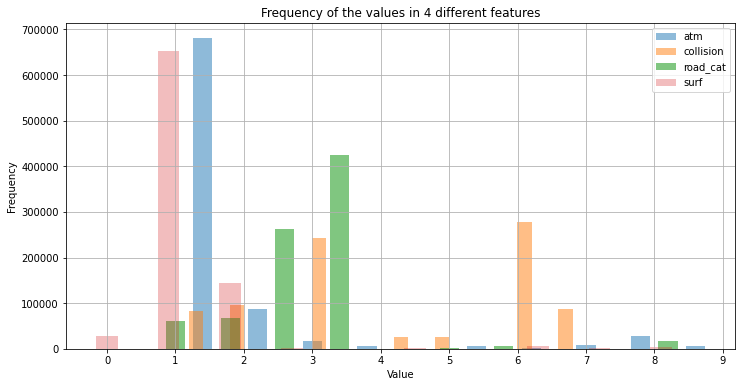

In [35]:
df['atm'].hist(alpha=0.5, rwidth=0.35, align='mid', figsize=(12,6), label='atm')
df['col'].hist(alpha=0.5, rwidth=0.35, align='mid', label='collision')
df['road_cat'].hist(alpha=0.6, rwidth=0.35, align='left', label='road_cat')
df['surf'].hist(alpha=0.3,rwidth=0.35, align='left', label='surf')
plt.title('Frequency of the values in 4 different features', size=12)
plt.xticks(range(10))
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

In [36]:
df['atm'].fillna(9, inplace=True)
df['col'].fillna(6, inplace=True)
df['road_cat'].fillna(9, inplace=True)
df['surf'].fillna(9, inplace=True)
df['surf'].replace(0,9, inplace=True)
df.surf.value_counts()

1.0    652322
2.0    143254
9.0     32498
7.0      5474
5.0      2643
8.0      2159
3.0       861
6.0       466
4.0       308
Name: surf, dtype: int64

In [37]:
df[['traf_reg', 'num_lanes','res_lane', 'long_prof', 'shape', 'infra', 'situation']].describe()

,traf_reg,num_lanes,res_lane,long_prof,shape,infra,situation
count,839187.000000,838195.000000,838345.000000,838924.000000,838909.000000,838707.000000,838983.000000
mean,1.855246,2.039593,0.130675,1.135474,1.198732,0.438958,1.147201
std,0.720949,1.550779,0.555434,0.620295,0.722200,1.350905,0.722495
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000
50%,2.000000,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,2.000000,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,4.000000,99.000000,3.000000,4.000000,4.000000,7.000000,5.000000


 Regarding the infrastructure and the existance of a reservet lane nearby, at least 75% of values are 0. These two features will be drop as to many values are unknown.

In [38]:
df.drop(['infra', 'res_lane'], axis=1, inplace=True)

In [39]:
df.num_lanes.fillna(0, inplace=True)
df['num_lanes'] = df['num_lanes'].apply(lambda x: 2 if x>6 or x==0 else x)
df.num_lanes.value_counts()

2.0    573670
1.0    101345
4.0     76934
3.0     66252
6.0     13945
5.0      7839
Name: num_lanes, dtype: int64

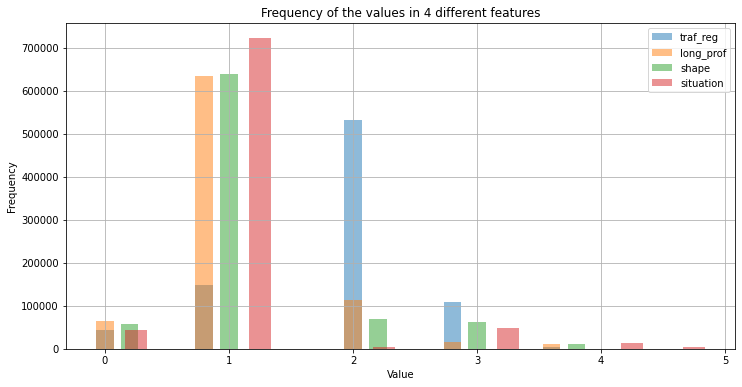

In [40]:
df['traf_reg'].hist(alpha=0.5, rwidth=0.35, align='left', figsize=(12,6), label='traf_reg')
df['long_prof'].hist(alpha=0.5,rwidth=0.35, align='left', label='long_prof')
df['shape'].hist(alpha=0.5,rwidth=0.35, align='mid', label='shape')
df['situation'].hist(alpha=0.5,rwidth=0.35, align='mid', label='situation')
plt.title('Frequency of the values in 4 different features', size=12)
plt.xticks(range(6))
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

Most frequent value for the traffic situation, road profile and shape is 1, while for the traffic regime is 2.

In [41]:
df['traf_reg'].fillna(0, inplace=True)
df['traf_reg'] = df['traf_reg'].replace(0,2)

df['long_prof'].fillna(0, inplace=True)
df['long_prof'] = df['long_prof'].replace(0,1)

df['shape'].fillna(0, inplace=True)
df['shape'] = df['shape'].replace(0,1)

df['situation'].fillna(0, inplace=True)
df['situation'] = df['situation'].replace(0,1)


Text(0.5, 1.0, 'School feature values')

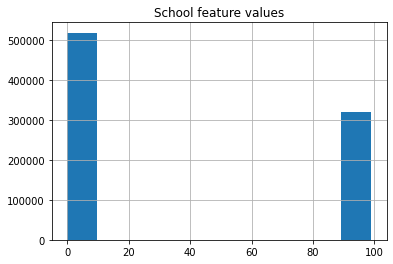

In [42]:
df.school.describe(), df.school.hist()
plt.title('School feature values')

In [43]:
df.school.fillna(0, inplace=True)
df['school'] = df.school.apply(lambda x:1 if x>0 else 0)

In [44]:
df["dep"] = df["dep"].div(10).apply(np.floor)
df["dep"] = df["dep"].astype(int)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 839985 entries, 0 to 839984
Data columns (total 24 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ID         839985 non-null  int64  
 1   time       839985 non-null  int64  
 2   lum        839985 non-null  int64  
 3   agg        839985 non-null  int64  
 4   int        839985 non-null  int64  
 5   atm        839985 non-null  float64
 6   col        839985 non-null  float64
 7   dep        839985 non-null  int64  
 8   road_cat   839985 non-null  float64
 9   traf_reg   839985 non-null  float64
 10  num_lanes  839985 non-null  float64
 11  long_prof  839985 non-null  float64
 12  shape      839985 non-null  float64
 13  surf       839985 non-null  float64
 14  situation  839985 non-null  float64
 15  school     839985 non-null  int64  
 16  crit_age   839985 non-null  int64  
 17  ped        839985 non-null  int64  
 18  dead_age   839985 non-null  int64  
 19  num_us     839985 non-n

# 4.Exploratory Data Analysis

Target: Severity
The data is almost evenly distributed on both high and low severity accidents

Accidents classified in each level of severity:
0    471695
1    368290
Name: sev, dtype: int64


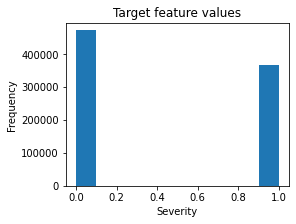

In [46]:
df.sev.plot.hist(figsize=(4,3))
plt.title('Target feature values')
plt.xlabel('Severity')
plt.ylabel('Frequency')
print('Accidents classified in each level of severity:')
print(df.sev.value_counts())

## Seasonality
* The number of traffic accidents decreased over the years from 2005 to 2013, after which the trend became stable.
* Analyszing the yearly trend there is a seasonal pattern where the number of accidents increase around March and then again in September.
* Regarding the day of the week there is not a significant difference between them. There is a steady trend during the week with more accidents on friday, and sunday is the day with less accident of all.
* Lastly analyzing the accidents per hour, there are clearly two spikes, one at 8am, the time people go to work and another one between 5 and 6pm, time when people return home. 
The number of accidents decreases between these two spikes, nothing unusual but it proves there is a pattern here.

In [47]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
date = df[['ID','sev', 'date']]
date.date


0        2016-02-01
1        2016-03-16
2        2016-07-13
3        2016-08-15
4        2016-12-23
            ...    
839980   2005-12-21
839981   2005-12-23
839982   2005-12-26
839983   2005-12-27
839984   2005-12-31
Name: date, Length: 839985, dtype: datetime64[ns]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

AttributeError: ignored

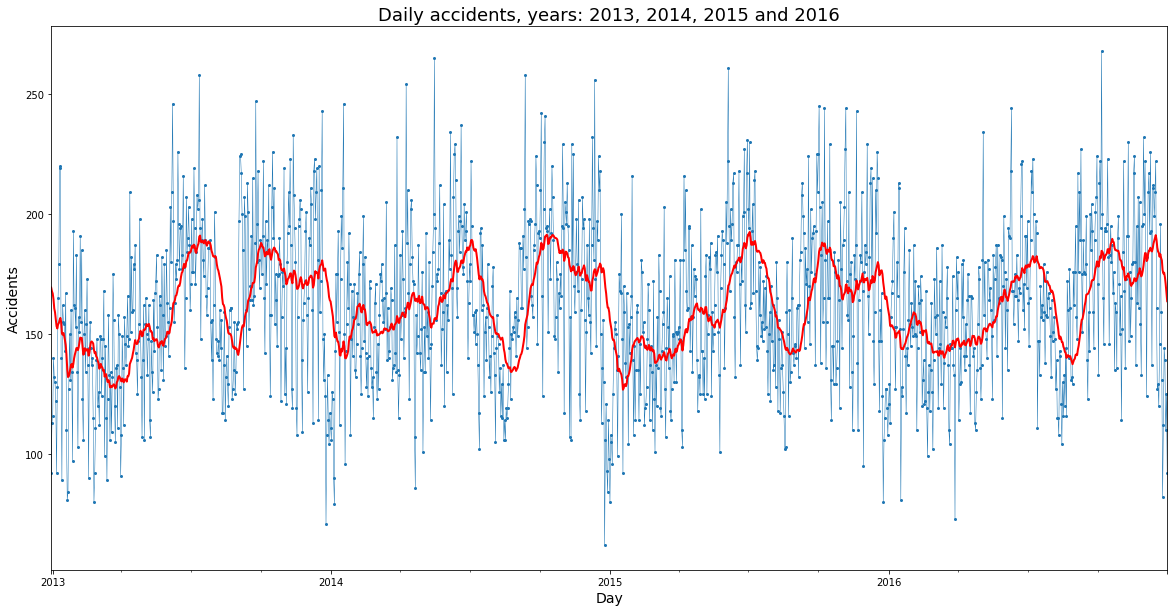

In [48]:
#Seasonality


date['year'] = df.date.dt.year
date['month'] = df.date.dt.month
date['weekday'] = df.date.dt.weekday
high_sev = date[date['sev']==1]

season = date[['date', 'ID']].groupby('date').count()
season['rolling'] = season.ID.rolling(window=30).mean()
season['ID'][365*8:].plot(figsize=(20,10), marker='o', markersize=2, linewidth=0.5, label='Daily trend')
season['rolling'][365*8:].plot(color='r', linewidth=2, label='Rolling mean')
plt.title('Daily accidents, years: 2013, 2014, 2015 and 2016', size=18)
plt.xlabel('Day', size=14)
plt.ylabel('Accidents', size=14)

t0 = dt.datetime.strptime('2012-12-15', '%Y-%m-%d')
t1 = dt.datetime.strptime('2017-01-15', '%Y-%m-%d')

plt.xlim(t0,t1)
plt.legend()
plt.show()

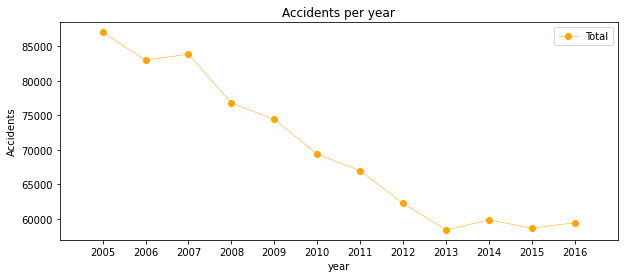

In [49]:
#By year

yearly = date[['year', 'ID']].groupby('year').count()
yearly['ID'].plot.line(figsize=(10,4), marker='o', linewidth=0.5, color='orange', label='Total')
plt.title('Accidents per year')
plt.xticks(range(2005,2017))
plt.xlim(2004,2017)
plt.ylabel('Accidents')
plt.legend()

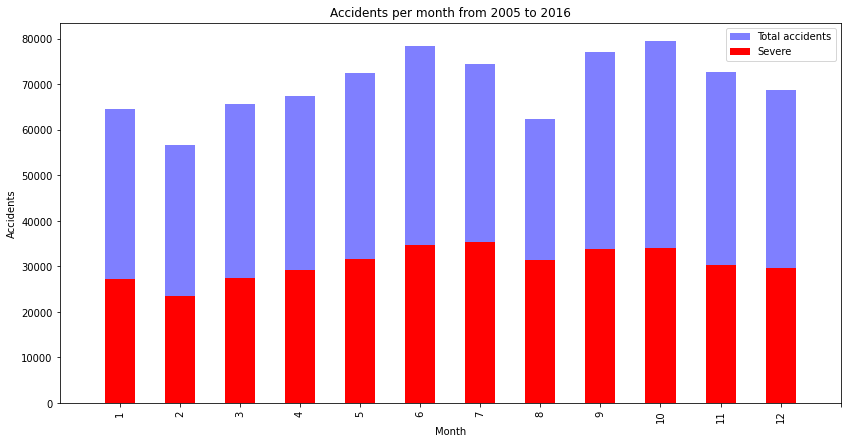

In [50]:
#By month

monthly = date[['month', 'ID']].groupby(['month']).count()
monthly['high_sev'] = high_sev[['month', 'ID']].groupby(['month']).count()


monthly['ID'].plot.bar(figsize=(14,7), alpha=0.5, color='blue', label='Total accidents')
monthly['high_sev'].plot.bar(color='red', label='Severe')

plt.title('Accidents per month from 2005 to 2016')
plt.xticks(range(13))
plt.xlim(-1,12)
# plt.ylim(50000,85000)
plt.xlabel('Month')
plt.ylabel('Accidents')
plt.legend()

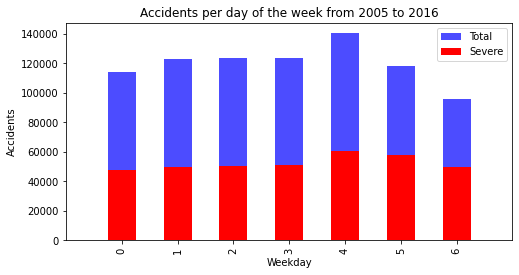

In [51]:
#day of the week
weekday = date[['weekday', 'ID']].groupby('weekday').count()
weekday['high_sev'] = high_sev[['weekday', 'ID']].groupby(['weekday']).count()
weekday['ID'].plot.bar(figsize=(8,4), alpha=0.7, color='blue', label='Total')
weekday['high_sev'].plot.bar(color='red', label='Severe')

plt.title('Accidents per day of the week from 2005 to 2016')
plt.xticks(range(7))
plt.xlim(-1,7)
# plt.ylim(75000,150000)
plt.xlabel('Weekday')
plt.ylabel('Accidents')
plt.legend()

839985

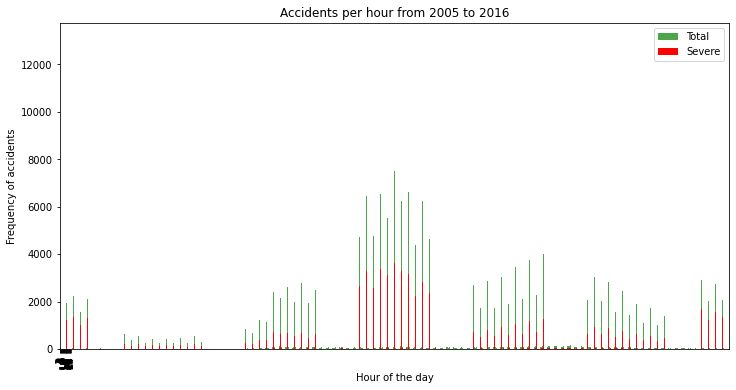

In [52]:
#By hour of the day

hourly = df[['ID', 'time']].groupby('time').count()
hourly['high_sev'] = df[df.sev==1][['ID', 'time']].groupby('time').count()
hourly['ID'].plot.bar(figsize=(12,6), alpha=0.7, color='g', label='Total')
hourly['high_sev'].plot.bar(color='r', label='Severe')
plt.xticks(range(24))
plt.title('Accidents per hour from 2005 to 2016')
plt.xlabel('Hour of the day')
plt.ylabel('Frequency of accidents')
plt.legend()
# df.time.value_counts()
# hourly.ID.value_counts()
hourly['ID'].sum()

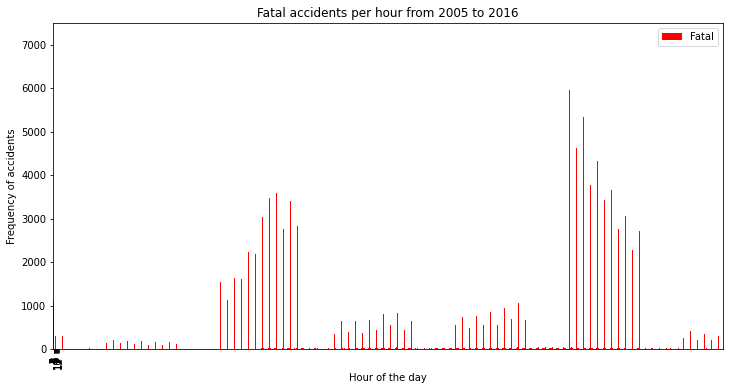

In [53]:
#Zoom in fatal accidents by hour of the day

hourly['high_sev'].plot.bar(figsize=(12,6),color='r', label='Fatal')
plt.xticks(range(12))
plt.ylim((0,7500))
plt.title('Fatal accidents per hour from 2005 to 2016')
plt.xlabel('Hour of the day')
plt.ylabel('Frequency of accidents')
plt.legend()

In [54]:
noon_morn_severe = hourly.high_sev.loc[0:6].sum()+hourly.high_sev.loc[21:23].sum()
day_severe = hourly.high_sev.loc[7:20].sum()
noon_morn = hourly.ID.loc[0:6].sum()+hourly.ID.loc[21:23].sum()
day = hourly.ID.loc[7:20].sum()
noon_morn_prop = (noon_morn_severe/noon_morn)*100
day_prop = (day_severe/day)*100
print('The percentage of severe accidents from 9pm to 6am is {0:0.2f}% of the total amount of accidents ocurring between this hours,\
     while the percentage of deathly accidents from 7am to 8pm is {1:2.2f}%.'.format(noon_morn_prop.round(2), day_prop))

The percentage of severe accidents from 9pm to 6am is 49.61% of the total amount of accidents ocurring between this hours,     while the percentage of deathly accidents from 7am to 8pm is 49.26%.


In [55]:
df['month'] = df.date.dt.month
df['day'] = df.date.dt.day

In [56]:
df.day.value_counts

<bound method IndexOpsMixin.value_counts of 0          1
1         16
2         13
3         15
4         23
          ..
839980    21
839981    23
839982    26
839983    27
839984    31
Name: day, Length: 839985, dtype: int64>

# Correlation

In [57]:
df[['sev','lum', 'agg', 'int', 'atm',
    'col', 'dep', 'road_cat', 'traf_reg',
    'num_lanes', 'long_prof', 'shape', 'surf', 
    'situation', 'school', 'crit_age','dead_age', 'ped',
    'num_us', 'weekend', 'holiday', 'month', 'day']].corr()['sev'].sort_values(ascending=False)

sev          1.000000
shape        0.144514
situation    0.128954
weekend      0.077594
traf_reg     0.076691
long_prof    0.069781
dead_age     0.048087
atm          0.048012
num_us       0.027533
col          0.026740
holiday      0.021744
month        0.008851
lum          0.002701
day          0.002161
surf         0.000874
ped         -0.005999
school      -0.025260
crit_age    -0.038168
int         -0.062982
road_cat    -0.100728
num_lanes   -0.101300
dep         -0.105883
agg         -0.277563
Name: sev, dtype: float64

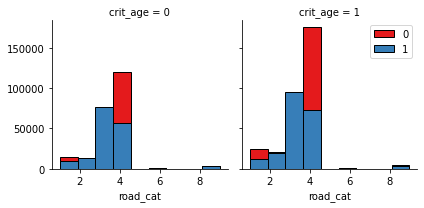

In [58]:
bins = np.linspace(df.atm.min(), df.atm.max(), 10)
g = sns.FacetGrid(df, col="crit_age", hue="sev", palette="Set1", col_wrap=2)
g.map(plt.hist,'road_cat', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


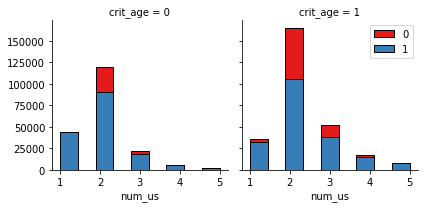

In [59]:
bins = np.linspace(df.lum.min(), df.lum.max(), 10)
g = sns.FacetGrid(df, col="crit_age", hue="sev", palette="Set1", col_wrap=2)
g.map(plt.hist, 'num_us', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

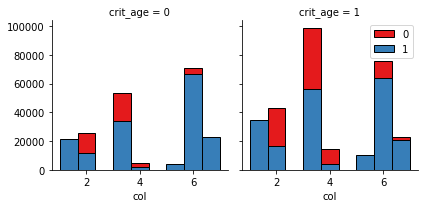

In [60]:
bins = np.linspace(df.col.min(), df.col.max(), 10)
g = sns.FacetGrid(df, col="crit_age", hue="sev", palette="Set1", col_wrap=2)
g.map(plt.hist, 'col', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

Text(0.5, 0, 'Severity')

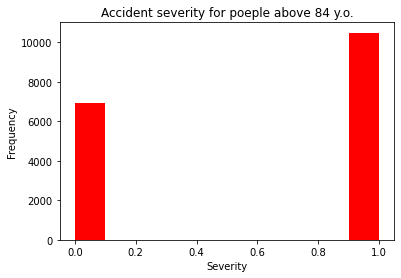

In [61]:
df['sev'][df['dead_age']==1].plot.hist(color='r')
# plt.xlabel('Hour of the day')
plt.title('Accident severity for poeple above 84 y.o.')
plt.xlabel('Severity')

# 5. Data Preparation

In [62]:
df.drop(['ID', 'date'], axis=1, inplace=True)

In [63]:
#Normalizing the data makes that any feature has more influence in the result than others.

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# X = df.drop('sev', axis=1)
# X = StandardScaler().fit(X).transform(X)

xtrain, xtest, ytrain, ytest = train_test_split(df.drop('sev', axis=1), df['sev'], test_size=0.2, random_state=8)
xtrain, xval, ytrain, yval = train_test_split(xtrain, ytrain, test_size=0.2) 


print('Size of training set:', xtrain.shape[0],'\n'
      'Size of test set:',xtest.shape[0],'\n'
      'Size of evaluation set:', xval.shape[0])

Size of training set: 537590 
Size of test set: 167997 
Size of evaluation set: 134398


# 6. Model Develoment

In [64]:
#importing models 

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#Evaluation Metrics
import time
from sklearn.metrics import accuracy_score, log_loss, jaccard_similarity_score, classification_report
from sklearn.metrics import precision_score, recall_score, roc_curve


1. Decision Tree

In [65]:

t0=time.time()
tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(xtrain,ytrain)
print('Time taken :' , time.time()-t0)
yhat = tree.predict(xval)
score_tree = accuracy_score(yval,yhat)
print('Accuracy :',score_tree)

Time taken : 8.269412994384766
Accuracy : 0.6380675307668269



1.1. Random Forest

In [66]:
#RF 1

t0=time.time()
model_rf = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0, n_jobs=-1)
model_rf.fit(xtrain,ytrain)
print('Time taken :' , time.time()-t0)
yhat = model_rf.predict(xval)
score_rf = accuracy_score(yval,yhat)
print('Accuracy :',score_rf)

Time taken : 133.2755424976349
Accuracy : 0.7213649012634117


In [67]:
importances = pd.DataFrame({'feature':df.drop('sev', axis=1).columns,'importance':np.round(model_rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
time,0.163
dep,0.152
day,0.134
month,0.096
road_cat,0.053
col,0.044
num_us,0.042
agg,0.035
num_lanes,0.033


In [68]:
xtrain = pd.DataFrame(xtrain)
xtrain.drop(['dead_age', 'holiday', 'ped', 'situation', 'weekend', 'school', 'shape', 'crit_age', 'surf', 'long_prof','lum','atm'], axis=1, inplace=True)
xval.drop(['dead_age', 'holiday', 'ped', 'situation', 'weekend', 'school', 'shape', 'crit_age', 'surf', 'long_prof', 'lum', 'atm'], axis=1, inplace=True)
xtest.drop(['dead_age', 'holiday', 'ped', 'situation', 'weekend', 'school', 'shape', 'crit_age','surf', 'long_prof', 'lum', 'atm'], axis=1, inplace=True)

In [69]:
#RF 2:
#number of features reduced from 23 to 13

t0=time.time()
model_rf = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0, n_jobs=-1)
model_rf.fit(xtrain,ytrain)
print('Time taken :' , time.time()-t0)
yhat = model_rf.predict(xval)
score_rf = accuracy_score(yval,yhat)
print('Accuracy :',score_rf)

Time taken : 134.81413435935974
Accuracy : 0.7109257578237771


In [70]:
#RF 3:

#number of decision trees reduced from 100 to 50
#Limiting the number of features to look at when creating the next split to 5
#Limiting the max depth of the tree to 10


t0=time.time()
model_rf = RandomForestClassifier(n_estimators=50, max_features=5, max_depth =10 ,criterion='entropy',random_state=0, n_jobs=-1)
model_rf.fit(xtrain,ytrain)
print('Time taken :' , time.time()-t0)
yhat = model_rf.predict(xval)
score_rf = accuracy_score(yval,yhat)
print('Accuracy :',score_rf)

Time taken : 46.73271203041077
Accuracy : 0.7159779163380408


In [71]:
#RF 4:

#number of decision trees reduced from 50 to 10
#Limiting the number of features to look at when creating the next split to 8
#Limiting the max depth of the tree to 12


t0=time.time()
model_rf = RandomForestClassifier(n_estimators=10, max_features=8, max_depth =12,criterion='entropy',random_state=0, n_jobs=-1)
model_rf.fit(xtrain,ytrain)
print('Time taken :' , time.time()-t0)
yhat = model_rf.predict(xval)
score_rf = accuracy_score(yval,yhat)
print('Accuracy :',score_rf)

Time taken : 16.2274911403656
Accuracy : 0.72159555945773


In [72]:
#evaluation
t0=time.time()
model_rf = RandomForestClassifier(n_estimators=10, max_features=8, max_depth =12,criterion='entropy',random_state=0, n_jobs=-1)
model_rf.fit(xtrain,ytrain)
t_rf = time.time()-t0
print('Time taken :' , t_rf)
yhat_rf = model_rf.predict(xtest)
jaccard_rf = jaccard_similarity_score(ytest,yhat_rf)
c_rf = classification_report(ytest,yhat_rf)
prec_rf = precision_score(ytest, yhat_rf)
rec_rf = recall_score(ytest, yhat_rf)
print('Jaccard :',jaccard_rf,'\n',
     c_rf)

Time taken : 15.730784893035889


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


Jaccard : 0.7228521937891748 
               precision    recall  f1-score   support

           0       0.72      0.82      0.77     94297
           1       0.72      0.60      0.66     73700

    accuracy                           0.72    167997
   macro avg       0.72      0.71      0.71    167997
weighted avg       0.72      0.72      0.72    167997



# 2. LogisticRegression

In [73]:
acc=np.zeros(6)
i=0
for c in [0.5, 0.1, 0.01, 0.001, 10, 100]:
    lr = LogisticRegression(C=c, solver='liblinear').fit(xtrain, ytrain)
    yhat = lr.predict(xval)
    acc[i] = accuracy_score(yval,yhat)
    i+=1
acc

array([0.6605009 , 0.66045626, 0.66079852, 0.66146074, 0.66047858,
       0.66049346])

In [74]:
#Evaluation

t0=time.time()
lr = LogisticRegression(C=0.001, solver='liblinear').fit(xtrain, ytrain)
t_lr = time.time()-t0
print('Time taken :' , t_lr)
yhat = lr.predict(xtest)
jaccard_lr = jaccard_similarity_score(ytest,yhat)
c_lr = classification_report(ytest,yhat)
prec_lr = precision_score(ytest, yhat)
rec_lr = recall_score(ytest, yhat)
print('Jaccard :',jaccard_lr,'\n',
     c_lr)

Time taken : 8.227137327194214


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


Jaccard : 0.6620356315886593 
               precision    recall  f1-score   support

           0       0.66      0.82      0.73     94297
           1       0.67      0.46      0.54     73700

    accuracy                           0.66    167997
   macro avg       0.66      0.64      0.64    167997
weighted avg       0.66      0.66      0.65    167997



# 3. KNN

In [75]:
tt = xtrain.shape[0]
tv = xval.shape[0]
xtrain[int(tt*0.5):].shape[0], xval[int(tv*0.5):].shape[0]

(268795, 67199)

In [76]:
ks = 17
mean_acc = np.zeros(ks-1)
std_acc = np.zeros(ks-1)

for n in range(1,ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(xtrain[int(tt*0.5):],ytrain[int(tt*0.5):])
    yhat = neigh.predict(xval[int(tv*0.5):])
    mean_acc[n-1] = accuracy_score(yval[int(tv*0.5):],yhat)
    std_acc[n-1] = np.std(yhat==yval[int(tv*0.5):])/np.sqrt(yhat.shape[0])
print('Best performing K is '+ str(mean_acc.argmax()+1) + ' with an accuracy of ' +str(mean_acc.max()))


Best performing K is 16 with an accuracy of 0.6313337996101133


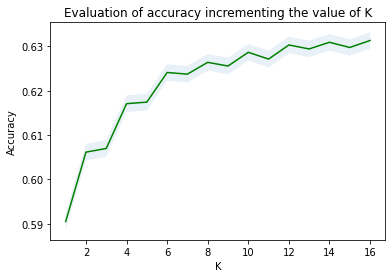

In [77]:
plt.plot(range(1,ks),mean_acc,'g')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Evaluation of accuracy incrementing the value of K')
plt.fill_between(range(1,ks),mean_acc-1*std_acc,mean_acc+1*std_acc, alpha=0.1)

In [78]:
#evaluation|

t0=time.time()
model_knn = KNeighborsClassifier(n_neighbors = 16, n_jobs=-1)
model_knn.fit(xtrain,ytrain)
t_knn = time.time()-t0
print('Time taken :' , t_knn)
yhat = model_knn.predict(xtest)
jaccard_knn = jaccard_similarity_score(ytest,yhat)
c_knn = classification_report(ytest,yhat)
prec_knn = precision_score(ytest, yhat)
rec_knn = recall_score(ytest, yhat)
print('Jaccard :',jaccard_knn,'\n',
     c_knn)

Time taken : 4.462690830230713


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


Jaccard : 0.6435769686363447 
               precision    recall  f1-score   support

           0       0.65      0.77      0.71     94297
           1       0.62      0.48      0.54     73700

    accuracy                           0.64    167997
   macro avg       0.64      0.63      0.63    167997
weighted avg       0.64      0.64      0.64    167997



# 4. SVM

In [79]:
size = [1000,5000,10000,12000,15000,20000,30000,40000,50000,75000,100000]
acc = []
t = []
for s in size:
    t0=time.time()
    sv = SVC().fit(xtrain[:s],ytrain[:s])
    t.append(time.time()-t0)
    yhat = sv.predict(xval[:s])
    acc.append(jaccard_similarity_score(yval[:s],yhat))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/me

In [80]:
performance = pd.DataFrame({'acc':acc, 'time':t}, index=size)
performance

,acc,time
1000,0.564000,0.060095
5000,0.554000,1.400666
10000,0.558100,5.557400
12000,0.557833,7.921114
15000,0.561067,12.800895
20000,0.558450,21.507102
30000,0.556267,49.566028
40000,0.563200,91.929833
50000,0.563900,151.145529
75000,0.564440,425.341632


Text(0.5, 1.0, 'Time(s)')

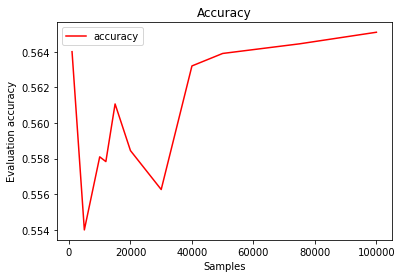

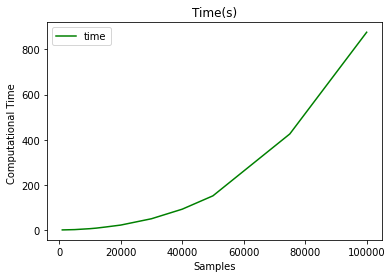

In [81]:
performance.plot(y='acc', color='r', label='accuracy')
plt.xlabel('Samples')
plt.ylabel('Evaluation accuracy')
plt.title('Accuracy')
performance.plot(y='time', color='green', label='time')
plt.xlabel('Samples')
plt.ylabel('Computational Time ')
plt.title('Time(s)')

In [82]:
#Evaluation

s=75000
t0=time.time()
sv = SVC().fit(xtrain[:s],ytrain[:s])
t_svm = time.time()-t0
print('Time taken :' , t_svm)
yhat = sv.predict(xtest[:s])
jaccard_svm = jaccard_similarity_score(ytest[:s],yhat)
c_svm = classification_report(ytest[:s],yhat)
prec_svm = precision_score(ytest[:s], yhat)
rec_svm = recall_score(ytest[:s], yhat)
print('Jaccard :',jaccard_lr,'\n',
     c_lr)

Time taken : 440.6032440662384


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


Jaccard : 0.6620356315886593 
               precision    recall  f1-score   support

           0       0.66      0.82      0.73     94297
           1       0.67      0.46      0.54     73700

    accuracy                           0.66    167997
   macro avg       0.66      0.64      0.64    167997
weighted avg       0.66      0.66      0.65    167997



#7. Results

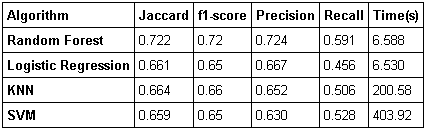

In [83]:
print('Jaccard:',jaccard_rf,'Precision:',prec_rf,'Recall:',rec_rf)
print('Jaccard:',jaccard_lr,'Precision:',prec_lr,'Recall:',rec_lr)
print('Jaccard:',jaccard_knn,'Precision:',prec_knn,'Recall:',rec_knn)
print('Jaccard:',jaccard_svm,'Precision:',prec_svm,'Recall:',rec_svm)

Jaccard: 0.7228521937891748 Precision: 0.7196503722887666 Recall: 0.6032564450474899
Jaccard: 0.6620356315886593 Precision: 0.6681437911094331 Recall: 0.4562143826322931
Jaccard: 0.6435769686363447 Precision: 0.621335018785772 Recall: 0.4801899592944369
Jaccard: 0.56628 Precision: 0.5231497127407908 Recall: 0.04738872221882079


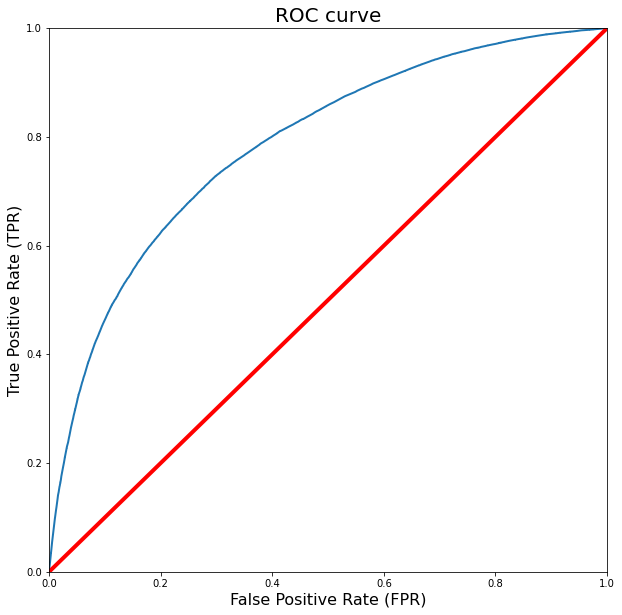

In [84]:
#ROC curve
yscores = model_rf.predict_proba(xtest)

false_positive_rate, true_positive_rate, thresholds = roc_curve(ytest.values, yscores[:,1])

def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label='a')
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(10, 10))
plt.title('ROC curve', fontsize=20)
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()